In [47]:
import pandas as pd 
import numpy as np

## Time Series Analysis

### General analysis

In [48]:
ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')

In [ ]:
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')

In [50]:
ratings_ba_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.715712e+06
mean,3.886281e+00,3.796439e+00,3.800010e+00,3.837103e+00,3.846609e+00,3.830343e+00
std,5.956038e-01,6.705662e-01,6.603258e-01,7.044489e-01,6.806139e-01,6.142972e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.530000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.930000e+00
75%,4.250000e+00,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00,4.230000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [80]:
ratings_rb_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06
mean,3.440407e+00,6.418375e+00,3.284702e+00,6.496641e+00,1.321530e+01,3.285543e+00
std,7.737700e-01,1.538632e+00,7.967887e-01,1.538095e+00,3.152041e+00,6.864740e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01,3.000000e+00
50%,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,3.400000e+00
75%,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


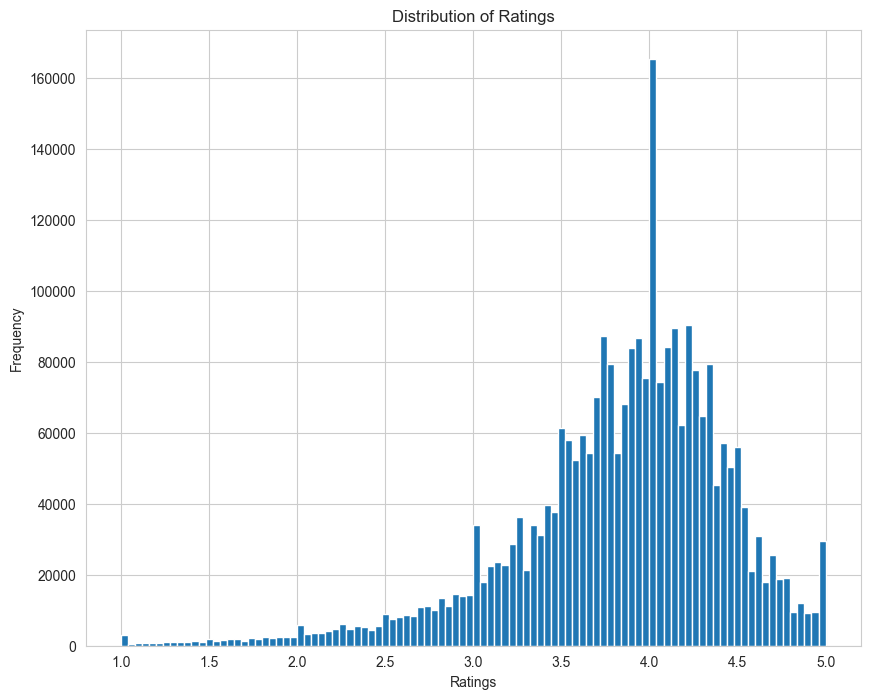

In [54]:
# plot distribution of ratings 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.hist(ratings_ba_df.rating, bins=100)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()



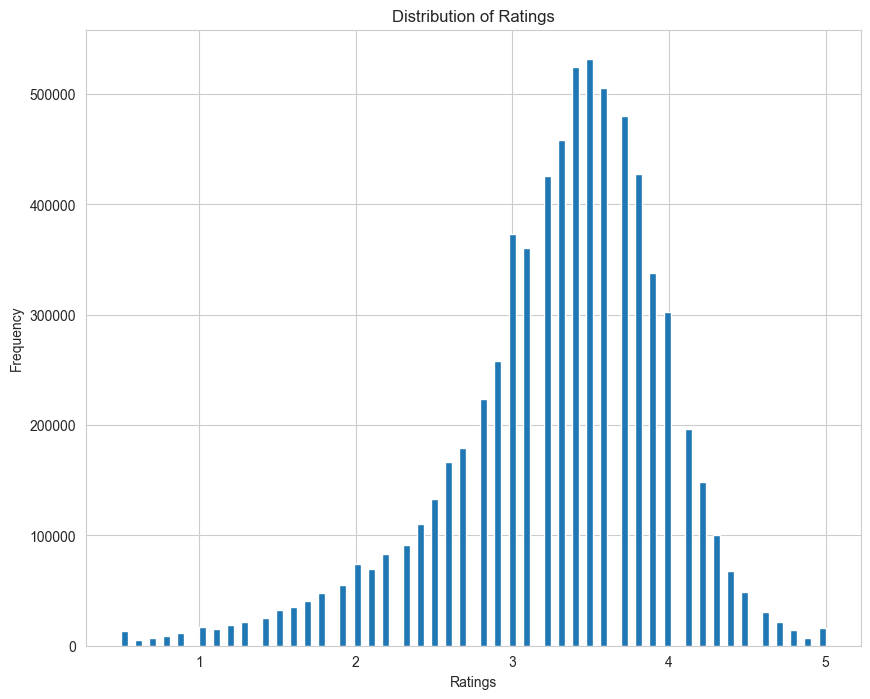

In [81]:
# plot distribution of ratings 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.hist(ratings_rb_df.rating, bins=100)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

### Some users analysis 

In [53]:
# group by user_id and count the number of ratings per user
user_ratings_count = ratings_ba_df.groupby('user_id')['user_id'].count()

# sort the values in descending order
user_ratings_count.sort_values(ascending=False, inplace=True)

user_ratings_count

user_id
stonedtrippin.601042    8970
uclabrewn84.439438      8768
sammy.3853              7894
beerchitect.14442       6778
biboergosum.168458      6616
                        ... 
nathanbeerfoo.554979       1
dkdpt2017.864077           1
dkeenan28.712265           1
nathan1979.739351          1
zzyzx.174143               1
Name: user_id, Length: 76244, dtype: int64

In [82]:
# group by user_id and count the number of ratings per user
user_ratings_count_rb = ratings_rb_df.groupby('user_id')['user_id'].count()

# sort the values in descending order
user_ratings_count_rb.sort_values(ascending=False, inplace=True)

user_ratings_count_rb

user_id
38926     43251
30149     39240
5328      32659
14280     23526
19328     23417
          ...  
207263        1
207274        1
207306        1
207307        1
489914        1
Name: user_id, Length: 70121, dtype: int64

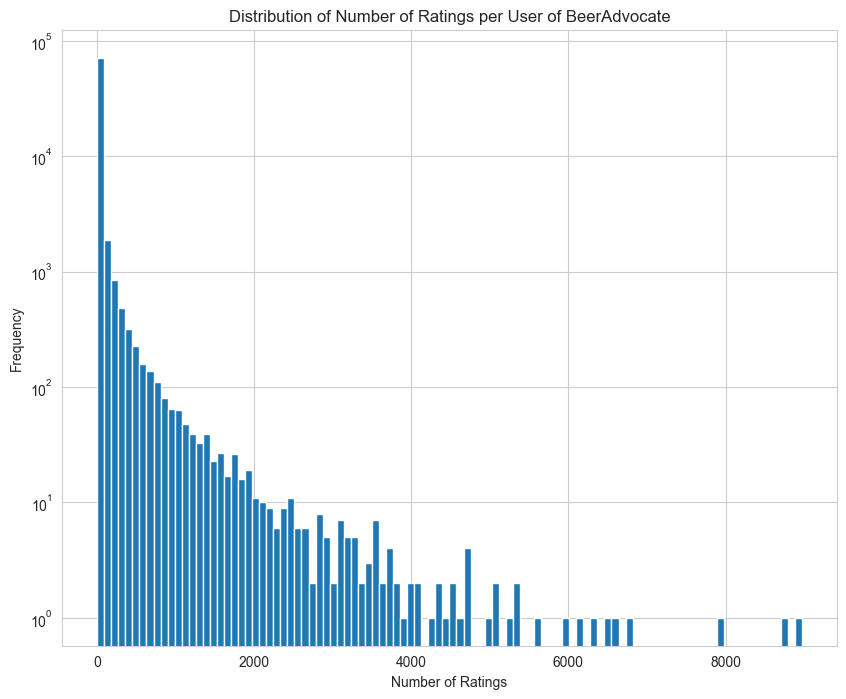

In [89]:
# plot distribution of the number of ratings per user with log scale
plt.figure(figsize=(10,8))
plt.hist(user_ratings_count, bins=100)
plt.yscale('log')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per User of BeerAdvocate')
plt.show()

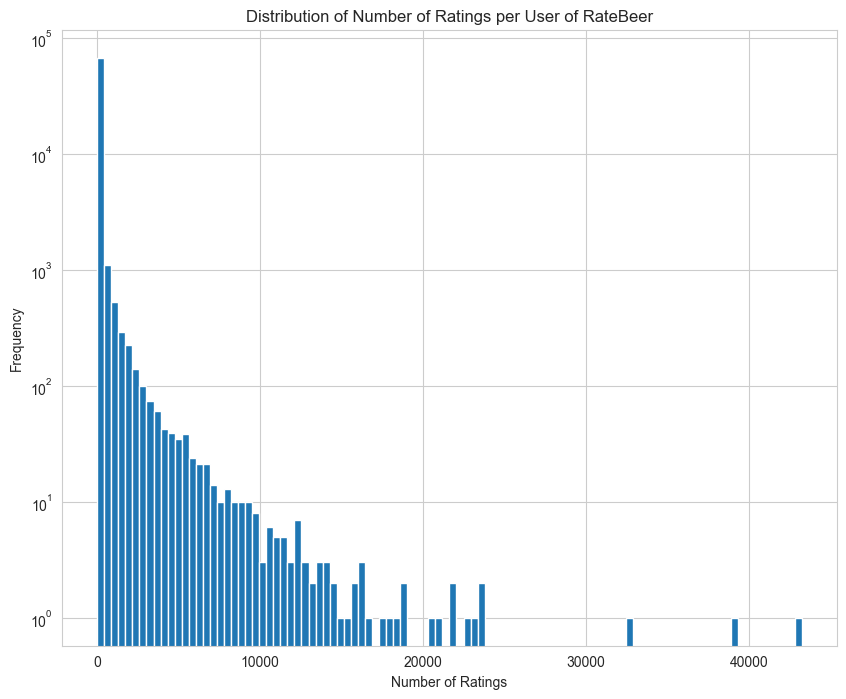

In [88]:
# plot distribution of the number of ratings per user with log scale
plt.figure(figsize=(10,8))
plt.hist(user_ratings_count_rb, bins=100)
plt.yscale('log')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per User of RateBeer')
plt.show()

In [56]:
users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')

In [57]:
users_ba_df.columns

Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')

In [58]:
users_ba_df = users_ba_df[['location', 'user_id']]
users_ba_df.columns = ['user_location', 'user_id']

In [59]:
ratings_users_ba_df = pd.merge(ratings_ba_df, users_ba_df, on='user_id', how='left')

In [60]:
# create new column named user_country and extract the country from user_location
ratings_users_ba_df['user_country'] = ratings_users_ba_df['user_location'].str.split(',').str[0]

In [61]:
# group by user_location and count the number of ratings per user_location
user_country_ratings_count = ratings_users_ba_df.groupby('user_country')['user_country'].count()

# sort the values in descending order
user_country_ratings_count.sort_values(ascending=False, inplace=True)

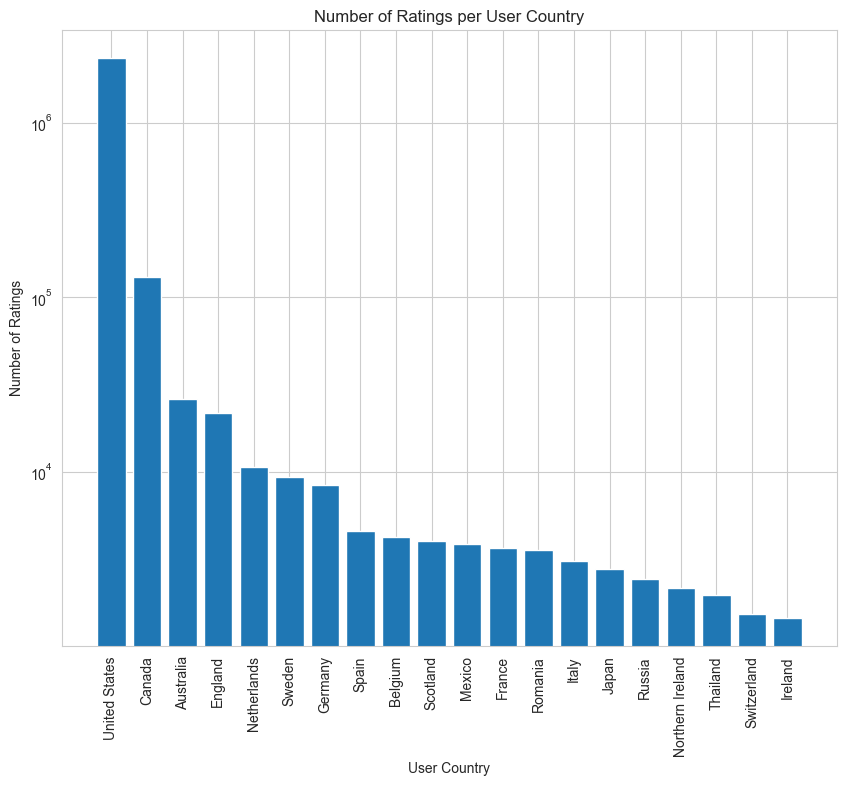

In [62]:
# plot in bar plot the number of ratings per user_country
plt.figure(figsize=(10,8))
plt.bar(user_country_ratings_count[:20].index, user_country_ratings_count[:20].values, log=True)
plt.xticks(rotation=90)
plt.xlabel('User Country')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per User Country')
plt.show()

/var/folders/59/4wtmm5814rs2dj58pby6qq240000gn/T/ipykernel_12572/3254934083.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/var/folders/59/4wtmm5814rs2dj58pby

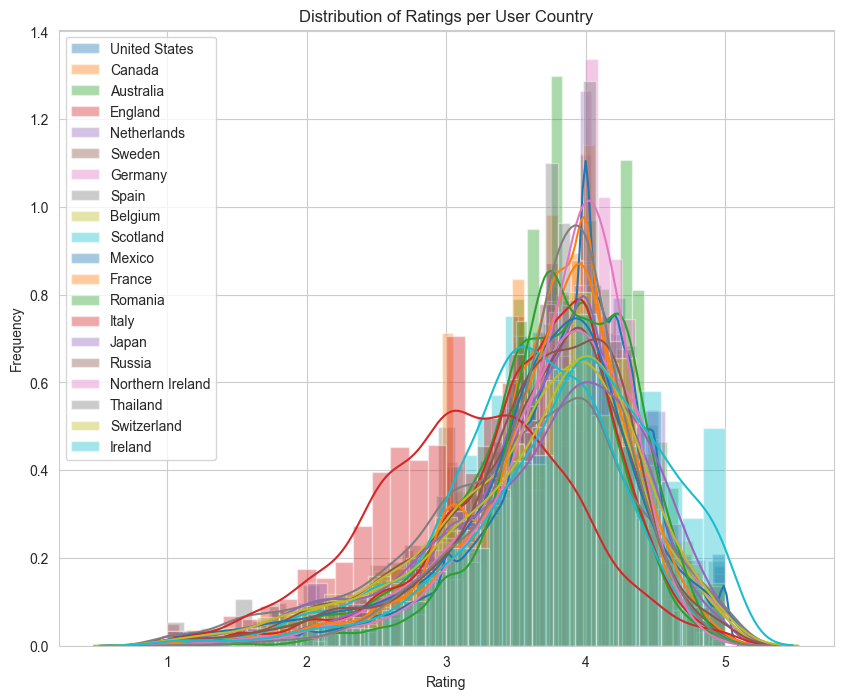

In [63]:
# plot the distribution of ratings per user_country
plt.figure(figsize=(10,8))
for country in user_country_ratings_count[:20].index:
    sns.distplot(ratings_users_ba_df[ratings_users_ba_df['user_country']==country]['rating'], label=country)
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User Country')
plt.show()

## Time series analysis

In [64]:
# transform date column to datetime format
ratings_users_ba_df['date'] = pd.to_datetime(ratings_users_ba_df['date'], unit='s')

In [65]:
# label from 0 to 5 the ratings as follows: if between 4 and 5, then label 5, if between 3 and 4, then label 4, etc.
ratings_users_ba_df['rating_label'] = ratings_users_ba_df['rating'].apply(lambda x: 5 if x >= 4 else (4 if x >= 3 else (3 if x >= 2 else (2 if x >= 1 else (1 if x >= 0 else 0)))))

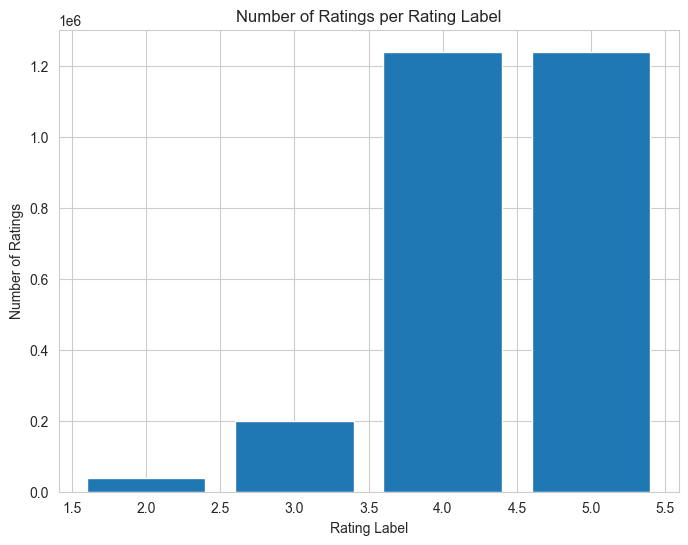

In [66]:
# group by rating_label and count the number of ratings per rating_label
rating_label_count = ratings_users_ba_df.groupby('rating_label')['rating_label'].count()

# plot in bar plot the number of ratings per rating_label
plt.figure(figsize=(8,6))
plt.bar(rating_label_count.index, rating_label_count.values)
plt.xlabel('Rating Label')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Rating Label')
plt.show()

In [67]:
# extract the year and month from date
ratings_users_ba_df['year'] = ratings_users_ba_df['date'].dt.year
ratings_users_ba_df['month'] = ratings_users_ba_df['date'].dt.month

# create new column named year_month
ratings_users_ba_df['year_month'] = ratings_users_ba_df['year'].astype(str) + '-' + ratings_users_ba_df['month'].astype(str)

# transform year_month column to datetime format
ratings_users_ba_df['year_month'] = pd.to_datetime(ratings_users_ba_df['year_month'])

### Yearly analysis

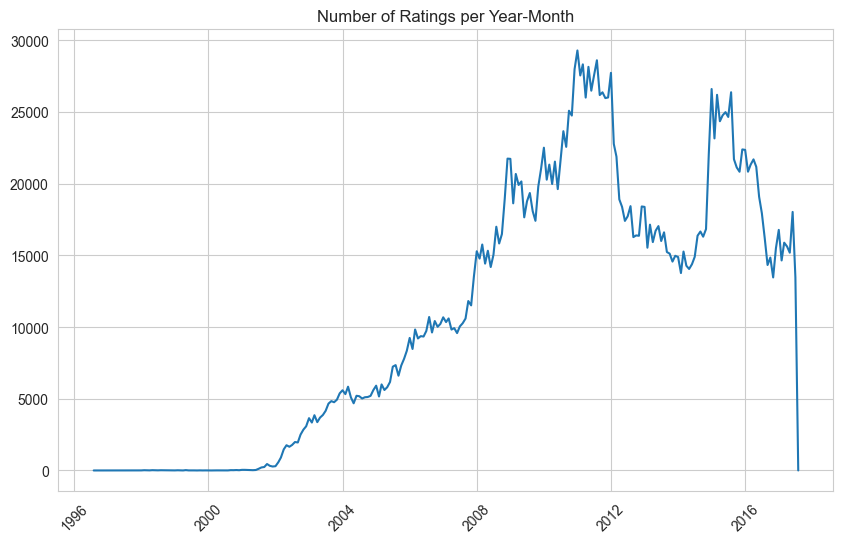

In [68]:
# group by year_month and count the number of ratings per year_month
year_month_ratings_count = ratings_users_ba_df.groupby('year_month')['year_month'].count()

# plot as line chart the number of ratings per year_month
plt.figure(figsize=(10,6))
plt.plot(year_month_ratings_count.index, year_month_ratings_count.values)
plt.title('Number of Ratings per Year-Month')
plt.xticks(rotation=45)
plt.show()

In [69]:
# min and max date
print(ratings_users_ba_df['date'].min())
print(ratings_users_ba_df['date'].max())

1996-08-22 10:00:00
2017-08-01 10:00:00


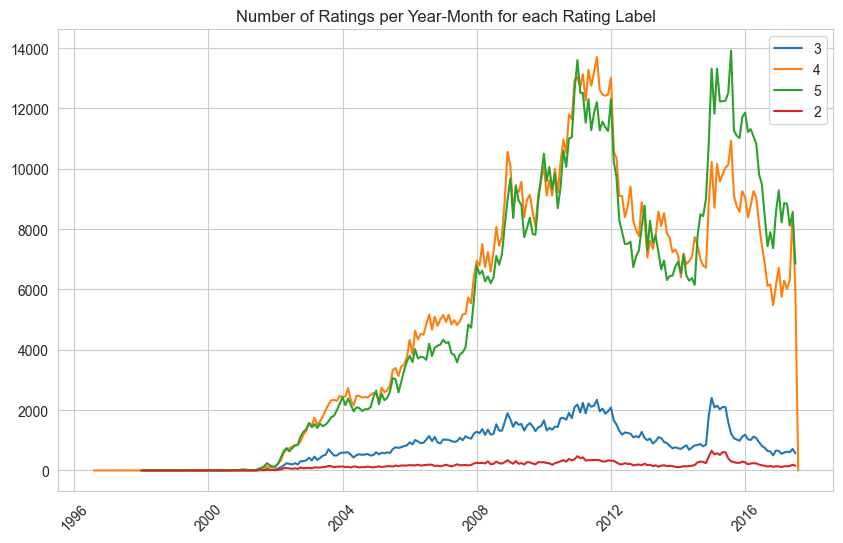

In [70]:
plt.figure(figsize=(10,6))

for label in ratings_users_ba_df['rating_label'].unique():
    plt.plot(ratings_users_ba_df[ratings_users_ba_df['rating_label']==label].groupby('year_month')['year_month'].count().index, ratings_users_ba_df[ratings_users_ba_df['rating_label']==label].groupby('year_month')['year_month'].count().values, label=label)
    
plt.title('Number of Ratings per Year-Month for each Rating Label')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [71]:
# create new dataframe with only the columns needed from year_month_ratings_count
year_month_ratings_count = pd.DataFrame(year_month_ratings_count.index)
year_month_ratings_count.columns = ['year_month']
year_month_ratings_count['nbr_ratings'] = ratings_users_ba_df.groupby('year_month')['year_month'].count().values

# create new column named year
year_month_ratings_count['year'] = year_month_ratings_count['year_month'].dt.year

# create new column named month
year_month_ratings_count['month'] = year_month_ratings_count['year_month'].dt.month

In [72]:
import plotly.express as px
import plotly.graph_objects as go 

year_month_ratings_count_2012 = year_month_ratings_count[(year_month_ratings_count['year'] >= 2012) & (year_month_ratings_count['year'] < 2017)]

# Compute mean number of ratings per month
mean_nbr_ratings_2012 = year_month_ratings_count_2012.groupby('month')['nbr_ratings'].mean()

fig = px.line(x=year_month_ratings_count_2012.month, y=year_month_ratings_count_2012.nbr_ratings, color=year_month_ratings_count_2012.year, title='Number of Ratings per Month (from 2012)')

fig.add_trace(go.Scatter(x=year_month_ratings_count_2012.month, y=mean_nbr_ratings_2012.values, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Number of Ratings')
fig.show()

In [73]:
# group by rating_label and year-month and count the number of ratings per rating_label and year-month
rating_label_year_month_count = ratings_users_ba_df.groupby(['rating_label', 'year_month'])['rating_label'].count().reset_index(name='nbr_ratings')

# create new column named year
rating_label_year_month_count['year'] = rating_label_year_month_count['year_month'].dt.year

# create new column named month
rating_label_year_month_count['month'] = rating_label_year_month_count['year_month'].dt.month

ratings_label = [2, 3, 4, 5]

for label in ratings_label: 
    label_df = rating_label_year_month_count[rating_label_year_month_count['rating_label']==label]
    
    label_df = label_df[(label_df['year'] >= 2012) & (label_df['year'] < 2017)]

    # Compute mean number of ratings per month
    mean_label_df = label_df.groupby('month')['nbr_ratings'].mean()

    fig = px.line(x=label_df.month, y=label_df.nbr_ratings, color=label_df.year, title='Number of Ratings per Month (from 2012 to 2017 excl.) for Rating Label ' + str(label))

    fig.add_trace(go.Scatter(x=label_df.month, y=mean_label_df.values, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

    fig.update_xaxes(title_text='Month')
    fig.update_yaxes(title_text='Number of Ratings')
    fig.show()